In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data = pd.read_csv('./HyderabadResturants.csv')
df=data
df.head()

,links,names,ratings,cuisine,price for one
0,https://www.zomato.com/hyderabad/sahara-bakers...,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,https://www.zomato.com/hyderabad/kfc-abids/order,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100
2,https://www.zomato.com/hyderabad/subbaiah-gari...,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100
3,https://www.zomato.com/hyderabad/paradise-biry...,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100
4,https://www.zomato.com/hyderabad/pista-house-b...,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   links          657 non-null    object
 1   names          657 non-null    object
 2   ratings        657 non-null    object
 3   cuisine        657 non-null    object
 4   price for one  657 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 25.8+ KB


In [4]:
df.shape

(657, 5)

In [5]:
df.columns

Index(['links', 'names', 'ratings', 'cuisine', 'price for one'], dtype='object')

In [6]:
df.isnull().sum()

links            0
names            0
ratings          0
cuisine          0
price for one    0
dtype: int64

**Data cleaning**

In [7]:
df=df.drop(['links'], axis=1)

In [8]:
df.dropna(how='any', inplace=True)

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [10]:
df=df.rename(columns={'price for one':'price','ratings':'rating','names':'name'})


In [11]:
df[["cuisine1", "cuisine2",'cuisine3','cuisine4' ,'cuisine5','cuisine6','cuisine7','cuisine8']] = (  # Create two new features
    df["cuisine"]           # from the cuisine feature
    .str                         # through the string accessor
    .split(",", expand=True)     # by splitting on ","
                                 # and expanding the result into separate columns
)

In [12]:
df.head()


,name,rating,cuisine,price,cuisine1,cuisine2,cuisine3,cuisine4,cuisine5,cuisine6,cuisine7,cuisine8
0,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100,Chinese,Bakery,Sichuan,Pizza,Burger,None,None,None
1,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100,Burger,Fast Food,Biryani,Desserts,Beverages,None,None,None
2,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100,South Indian,Andhra,Mithai,None,None,None,None,None
3,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100,Biryani,Kebab,Desserts,Beverages,None,None,None,None
4,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100,Fast Food,Sandwich,Pizza,Burger,Wraps,Rolls,Salad,Desserts


In [13]:
#df=df.drop(['cuisine'], axis=1)

In [14]:
df.head()

,name,rating,cuisine,price,cuisine1,cuisine2,cuisine3,cuisine4,cuisine5,cuisine6,cuisine7,cuisine8
0,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100,Chinese,Bakery,Sichuan,Pizza,Burger,None,None,None
1,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100,Burger,Fast Food,Biryani,Desserts,Beverages,None,None,None
2,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100,South Indian,Andhra,Mithai,None,None,None,None,None
3,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100,Biryani,Kebab,Desserts,Beverages,None,None,None,None
4,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100,Fast Food,Sandwich,Pizza,Burger,Wraps,Rolls,Salad,Desserts


**Data Visualization**

C:\Users\dilee\AppData\Local\Temp\ipykernel_6068\1996199569.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Number of outlets')

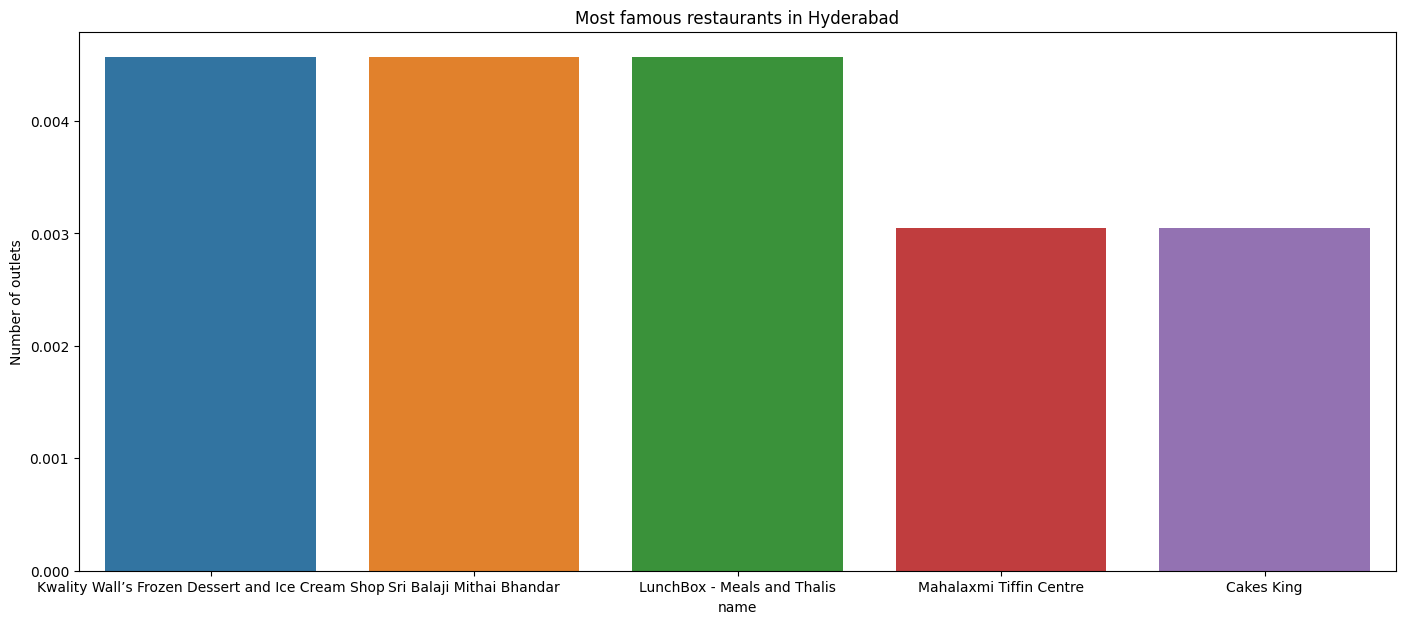

In [15]:
#Most Famous 5 restaurants in Banglore
plt.figure(figsize=(17,7))
chains=df['name'].value_counts(10)[:5]
sns.barplot(x=chains.index, y=chains, palette='tab10')
plt.title("Most famous restaurants in Hyderabad")
plt.ylabel("Number of outlets")

C:\Users\dilee\AppData\Local\Temp\ipykernel_6068\1098895727.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




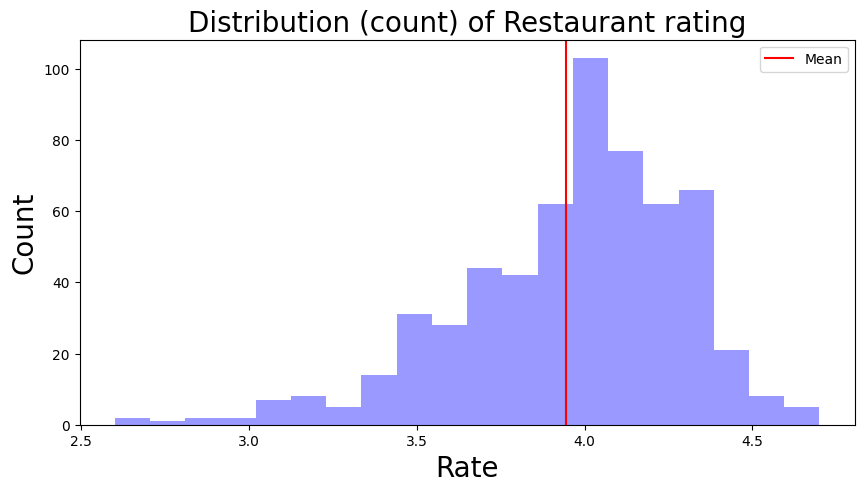

In [16]:
# Distribution of Restaurant Rating
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'rating' column to numeric, handling non-numeric values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce') # 'coerce' will set non-numeric values to NaN

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.distplot(df.rating.dropna(), kde=False, color='b', ax=ax, bins=20) # Drop NaN values for plotting
ax.axvline(df.rating.dropna().mean(), 0, 1, color='r', label='Mean')
ax.legend()
ax.set_ylabel('Count', size=20)
ax.set_xlabel('Rate', size=20)
ax.set_title('Distribution (count) of Restaurant rating', size=20)
plt.show()

C:\Users\dilee\AppData\Local\Temp\ipykernel_6068\2047526028.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




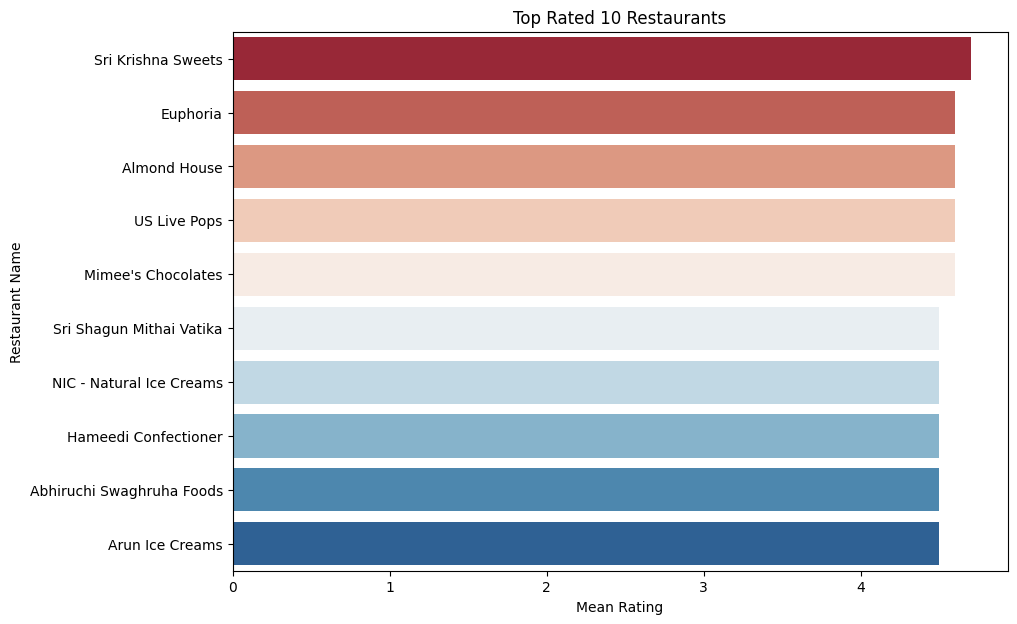

In [17]:
# Top 10 Rated Restaurants
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains your restaurant data with ratings

# Calculate mean rating per restaurant
mean_rating = df.groupby('name')['rating'].mean().reset_index()

# Sort by mean rating in descending order and select top 10
top_10_rating = mean_rating.sort_values(by='rating', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 7))
sns.barplot(data=top_10_rating, x='rating', y='name', palette='RdBu')
plt.title('Top Rated 10 Restaurants')
plt.xlabel('Mean Rating')
plt.ylabel('Restaurant Name')
plt.show()


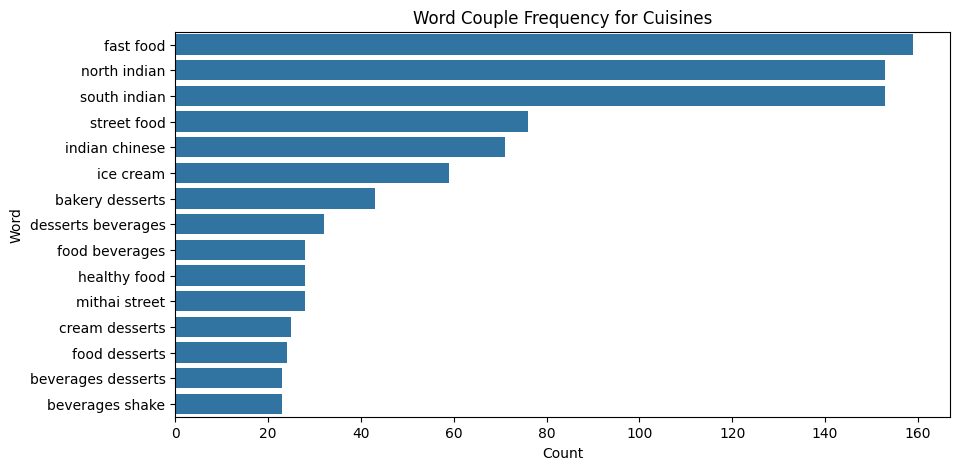

In [22]:
# Top 15 two word frequencies for Cuisines
def get_top_words(text, n, ngram_range):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(text)
    word_freq = X.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    word_count = list(zip(words, word_freq))
    word_count = sorted(word_count, key=lambda x: x[1], reverse=True)[:n]
    return word_count
lst = get_top_words(df['cuisine'], 15, (2,2))
df_words = pd.DataFrame(lst, columns=['Word', 'Count'])
plt.figure(figsize=(10, 5))
sns.barplot(data=df_words, x='Count', y='Word')
plt.title('Word Couple Frequency for Cuisines')
plt.show()


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'df' is your DataFrame containing restaurant data

# Convert 'cuisine' column to a list
feature = df["cuisine"].tolist()

# Create the TF-IDF matrix
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)

# Compute cosine similarity
similarity = cosine_similarity(tfidf_matrix)

# Create a Series with restaurant indices
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

def restaurant_recommendation(name, similarity=similarity):
    # Get the index of the restaurant
    index = indices[name]

    # Get similarity scores for the restaurant
    similarity_scores = list(enumerate(similarity[index]))

    # Sort the restaurants based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 similar restaurants
    similarity_scores = similarity_scores[1:11]

    # Get the indices and similarity scores of the top 10 similar restaurants
    restaurant_indices = [i[0] for i in similarity_scores]
    similarity_scores = [i[1] for i in similarity_scores]

    # Retrieve restaurant names and create a DataFrame
    recommendations = df.iloc[restaurant_indices][['name']].copy()
    recommendations['similarity_score'] = similarity_scores

    return recommendations


In [24]:
print(restaurant_recommendation('Paradise Biryani'))

                                   name  similarity_score
621           Potful - Claypot Biryanis          0.785054
37                      Behrouz Biryani          0.777898
303  Aarth - Authentic Claypot Biryanis          0.679747
245                     Makhni Brothers          0.622782
118                        Hotel Sohail          0.608559
500                    Heavenly Biryani          0.607885
43     Capital Multi Cuisine Restaurant          0.606294
646                 Bhatthi By Phulkaas          0.591336
122                   Redaan Restaurant          0.583342
18                  Meridian Restaurant          0.572388


In [25]:
print(restaurant_recommendation('KFC'))

                  name  similarity_score
391        Burger Eats          1.000000
509       Burger Hub's          0.804938
16         Burger King          0.729764
622    The Burger Life          0.729764
76    The Biryani Life          0.726618
405         Tasty Bite          0.725269
307       Burger It Up          0.688167
334      Sanjos Donuts          0.680656
374    Ritz Food World          0.680656
643  Aashu's Juice Bar          0.680656


In [26]:
print(restaurant_recommendation('Sahara Bakers'))

                                          name  similarity_score
573                           Bakers 'S' Treat          0.717998
19                                   KS Bakers          0.684408
98                                Oven Secretz          0.684408
153                               Baker Street          0.663045
227                 K&C Bakers & Confectioners          0.646992
260                               Noodle House          0.626991
339           Sahadeva Reddy's Chinese Kitchen          0.626991
605  Jai Bhavani Spicy Hut fast food & Tiffins          0.626991
287                    Bench Cafe & Restaurant          0.621031
295                           Garamm Chai Cafe          0.616317
